# Compare atmospheric forcing

Between ERA5, CESM1, CESM2

In [21]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import cartopy.feature as cfeature
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import cesm2_ensemble_members, region_names
from nemo_python_git.grid import region_mask
from nemo_python_git.utils import fix_lon_range
from nemo_python_git.file_io import find_cesm2_file, find_processed_cesm2_file

In [22]:
from nemo_python_git.interpolation import extend_into_mask, regrid_era5_to_cesm2

In [23]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

Double check land fill

In [24]:
# QREFHT, TREFHT, PRECT, PRECS, FSDS, FLDS
# msl/PSL, 
var_era5 = 'msr'
var_cesm2 = 'PRECS'
# era5_pro  = xr.open_dataset(f'{base_dir}ERA5-forcing/daily/files/processed/{var_era5}_time_y1991.nc')
# cesm2_pro = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_{var_cesm2}_y1991.nc')
# bias_pro  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_{var_cesm2}_bias_corr.nc')
era5_pro  = xr.open_dataset(f'{base_dir}ERA5-forcing/daily/files/processed/{var_cesm2}_mean_1979-2023.nc')
cesm2_pro = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/{var_cesm2}_mean_1979-2023.nc')
bias_pro  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_{var_cesm2}_bias_corr.nc')

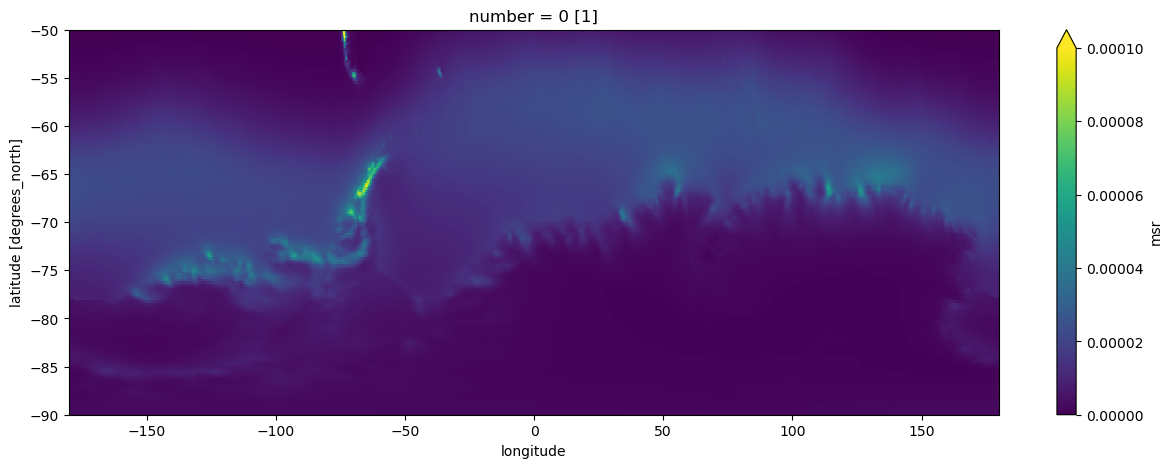

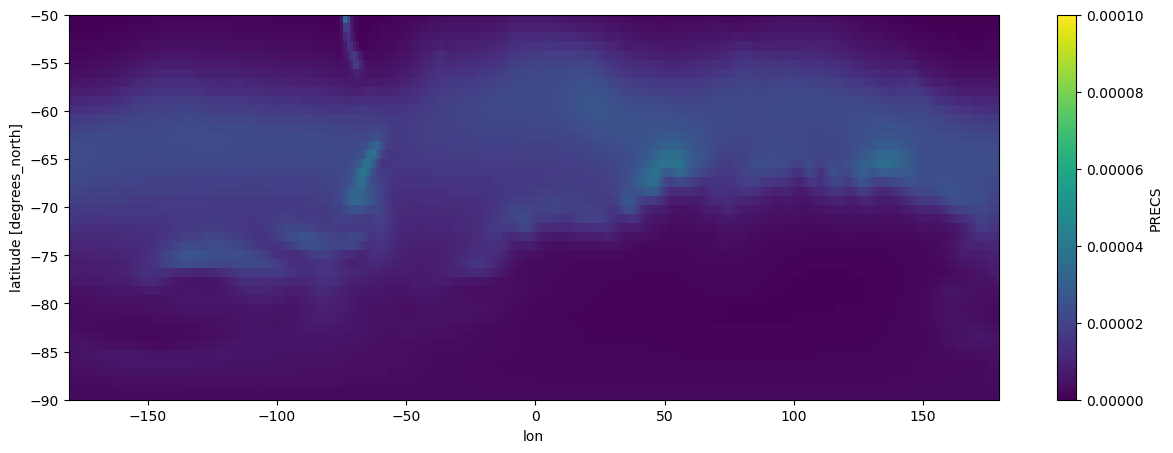

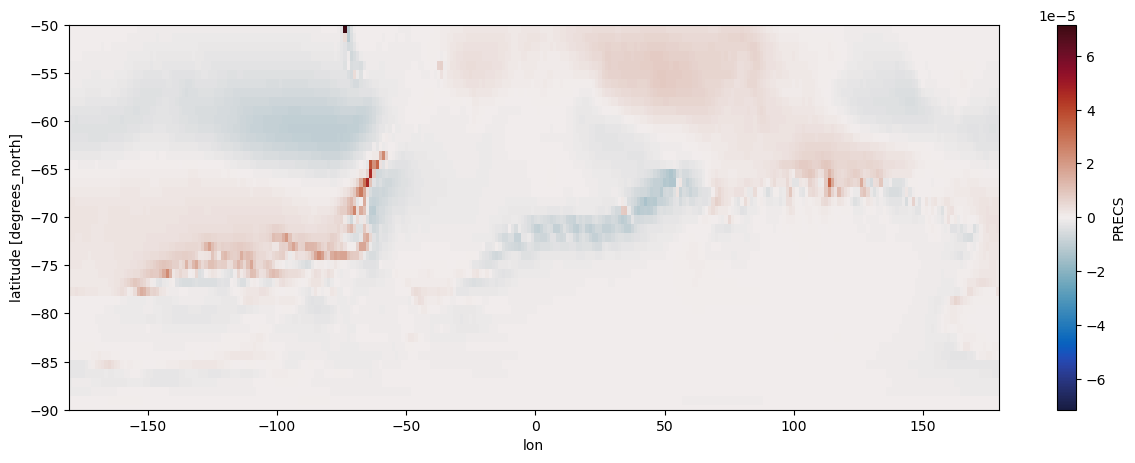

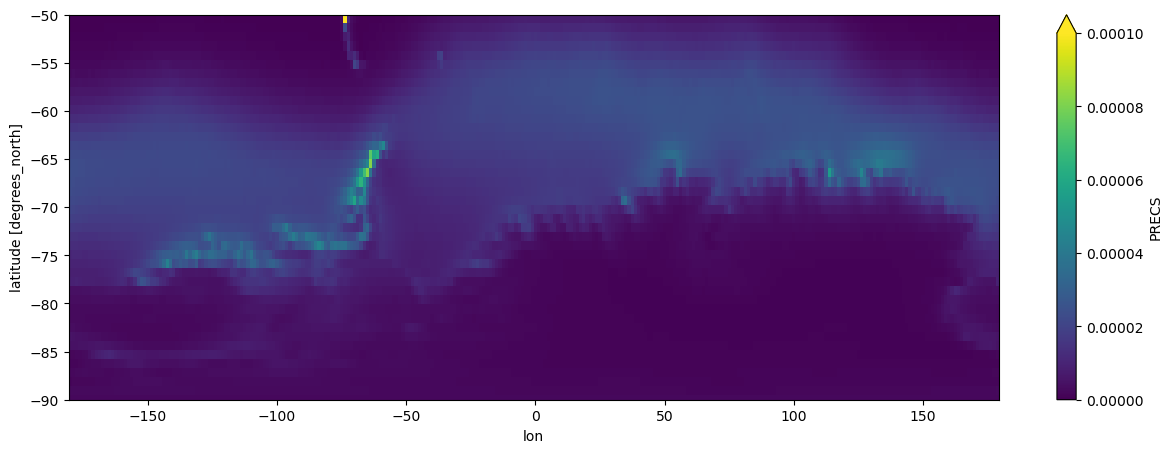

In [26]:
vmin=0; vmax=1e-4;
era5_pro[var_era5].plot(figsize=(15,5), ylim=(-90,-50), vmin=vmin, vmax=vmax)
cesm2_pro[var_cesm2].sortby('lon').plot(figsize=(15,5), ylim=(-90,-50), vmin=vmin, vmax=vmax)
bias_pro[var_cesm2].sortby('lon').plot(figsize=(15,5), ylim=(-90,-50), cmap=cmocean.cm.balance)
(cesm2_pro[var_cesm2].sortby('lon') + bias_pro[var_cesm2].sortby('lon')).plot(figsize=(15,5), ylim=(-90,-50), vmin=vmin, vmax=vmax)

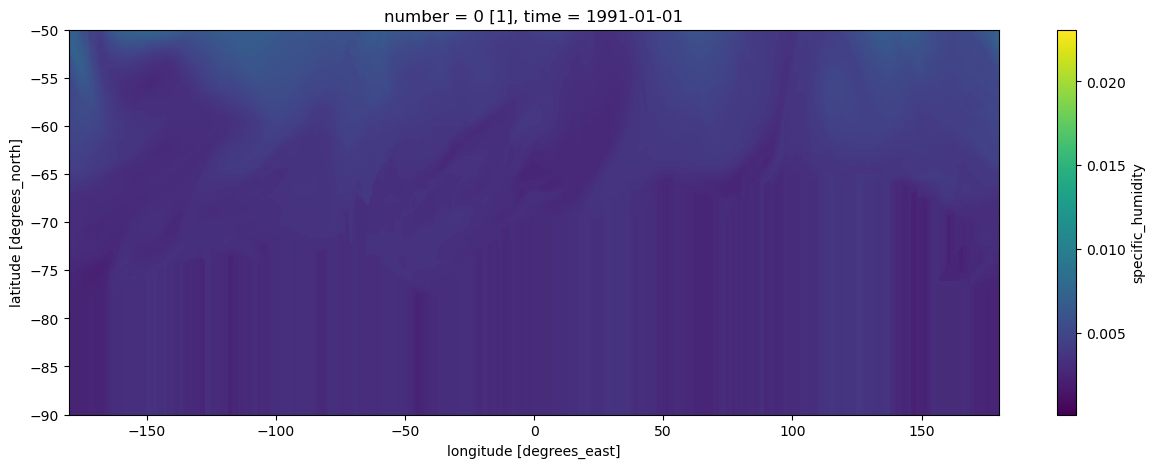

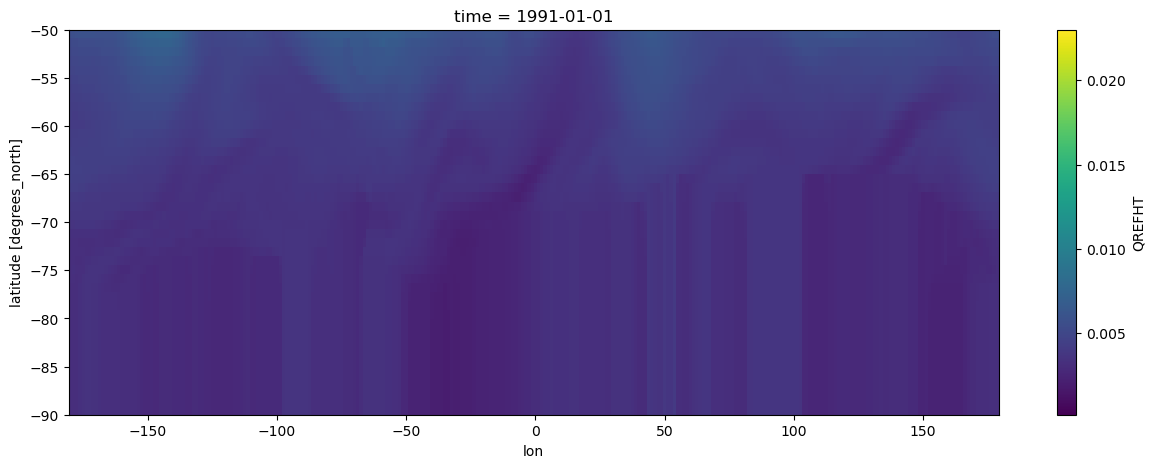

In [15]:
ts = 0
era5_pro['specific_humidity'].isel(time=ts).plot(figsize=(15,5), ylim=(-90,-50))
cesm2_pro[var_cesm2].isel(time=ts).sortby('lon').plot(figsize=(15,5), ylim=(-90,-50))
# bias_pro[var_cesm2].sortby('lon').plot(figsize=(15,5), ylim=(-90,-50), cmap=cmocean.cm.balance)

In [6]:
era5_ds = xr.open_dataset(f'{base_dir}ERA5-forcing/daily/files/msdwswrf_y1979.nc')
era5_ad = xr.open_dataset(f'{base_dir}ERA5-forcing/msdwswrf_y1979m01.nc')
era5_ad5 = xr.open_dataset(f'{base_dir}ERA5-forcing/msdwswrf_y1979m05.nc')
cesm2_pro = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/CESM2-LE2_ens1011.001_FLDS_y1979.nc')

In [5]:
variable='msr'
for year in range(1991, 1992):
    # convert time dimension: from valid_time --> time and dimension to unlimited
    for filename in glob.glob(f'{base_dir}ERA5-forcing/daily/files/{variable}*y{year}.nc'):
        with xr.open_dataset(filename, mode='a') as data:
            print(filename)
            data = data.rename_dims({'valid_time':'time'})
            data = data.rename({'avg_tsrwe':'msr'})
            try:
                # data = data.drop_vars('avg_tsrwe')
                # variable = filename.split('daily/')[1].split('_')[0]
                data.to_netcdf(f'{base_dir}ERA5-forcing/daily/{variable}_y{year}.nc', unlimited_dims={'time':True})
            except:
                continue

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/files/msr_y1991.nc


In [ ]:
for year in [1963]:
    # convert time dimension: from valid_time --> time and dimension to unlimited
    for filename in glob.glob(f'{base_dir}ERA5-forcing/daily/files/*y{year}.nc'):
        if filename.split('files/')[1].split('_')[0] == 'sph2m':
            print(filename)
            with xr.open_dataset(filename, mode='a') as data:
                # data = data.rename_dims({'valid_time':'time'})
                data = data.rename({'valid_time':'time'})
                variable = filename.split('files/')[1].split('_')[0]
                data.to_netcdf(f'{base_dir}ERA5-forcing/daily/files/processed/{variable}_time_y{year}.nc', unlimited_dims={'time':True})

In [ ]:
# JRA also has units in days since 1900-01-01
# ds['time'] = ds.time.values
        # ds['time'].encoding['units'] = "days since 1900-01-01"
        # ds['time'].encoding['calendar'] = 'gregorian'
# ds = ds.convert_calendar('gregorian')
year=1978
# convert time dimension: from valid_time --> time and dimension to unlimited
for filename in glob.glob(f'{base_dir}ERA5-forcing/daily/files/*y{year}.nc'):
    print(filename)
    with xr.open_dataset(filename, mode='a') as data:
        # data = data.rename_dims({'valid_time':'time'})
        data = data.rename({'valid_time':'time'})
        
        # data['time'].encoding['units'] = "days since 1900-01-01"
        variable = filename.split('files/')[1].split('_')[0]
        data.to_netcdf(f'{base_dir}ERA5-forcing/daily/files/processed/{variable}_time_y{year}.nc', unlimited_dims={'time':True})

Original ERA5 files adam blaker:
- time unlimited and:
    - int time(time) ;
    - time:standard_name = "time" ;
    - time:long_name = "time" ;
    - time:units = "hours since 1900-01-01 00:00:00.0" ;
    - time:calendar = "gregorian" ;
    - time:axis = "T" ;
My files:
- valid_time not set to unlimited and:
    - int64 valid_time(valid_time) ;
    - valid_time:time_shift = "-1 days +23:00:00" ;
    - valid_time:units = "days since 1979-01-01 00:00:00" ;
    - valid_time:calendar = "proleptic_gregorian" ;


In [7]:
ds0 = xr.open_dataset(f'{base_dir}output/ERA5_test10/files_spinup/eANT025.L121_1m_19790101_19791231_SBC.nc')
ds1 = xr.open_dataset(f'{base_dir}output/ERA5_daily/files0/eANT025.L121_1m_19790101_19791231_SBC.nc')
ds2 = xr.open_dataset(f'{base_dir}output/ERA5_daily_ecmwf/files0/eANT025.L121_1m_19790101_19791231_SBC.nc')
ds3 = xr.open_dataset(f'{base_dir}output/CESM2_hist5/files0/eANT025.L121_1m_19790101_19791231_SBC.nc')
ds4 = xr.open_dataset(f'{base_dir}output/ERA5_daily_interp/files0/eANT025.L121_1m_19790101_19791231_SBC.nc')
ds5 = xr.open_dataset(f'{base_dir}output/ERA5_daily_cycle/files0/eANT025.L121_1m_19790101_19791231_SBC.nc')

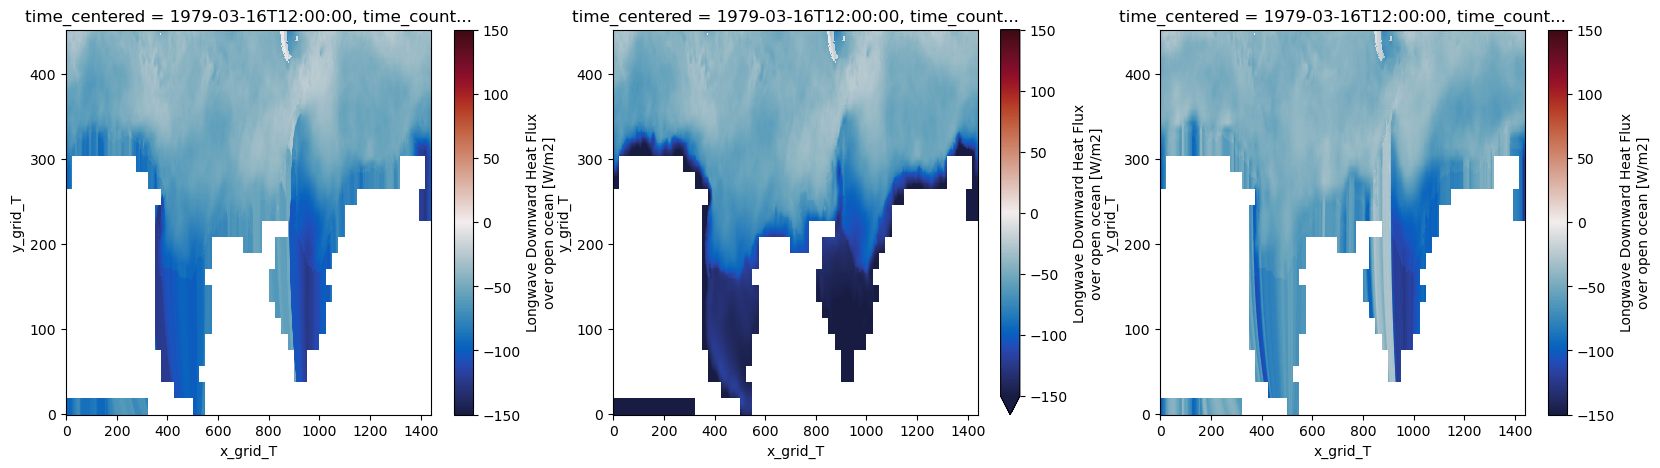

In [9]:
td=2
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=td).qlw_oce.plot(ax=ax[0], vmin=-150, vmax=150, cmap=cmocean.cm.balance)
ds4.isel(time_counter=td).qlw_oce.plot(ax=ax[1], vmin=-150, vmax=150, cmap=cmocean.cm.balance)
ds3.isel(time_counter=td).qlw_oce.plot(ax=ax[2], vmin=-150, vmax=150, cmap=cmocean.cm.balance)

In [ ]:
(ds5-ds4).isel(time_counter=td).qsr_oce.plot(figsize=(10,5), vmin=-20, vmax=20, cmap=cmocean.cm.balance)

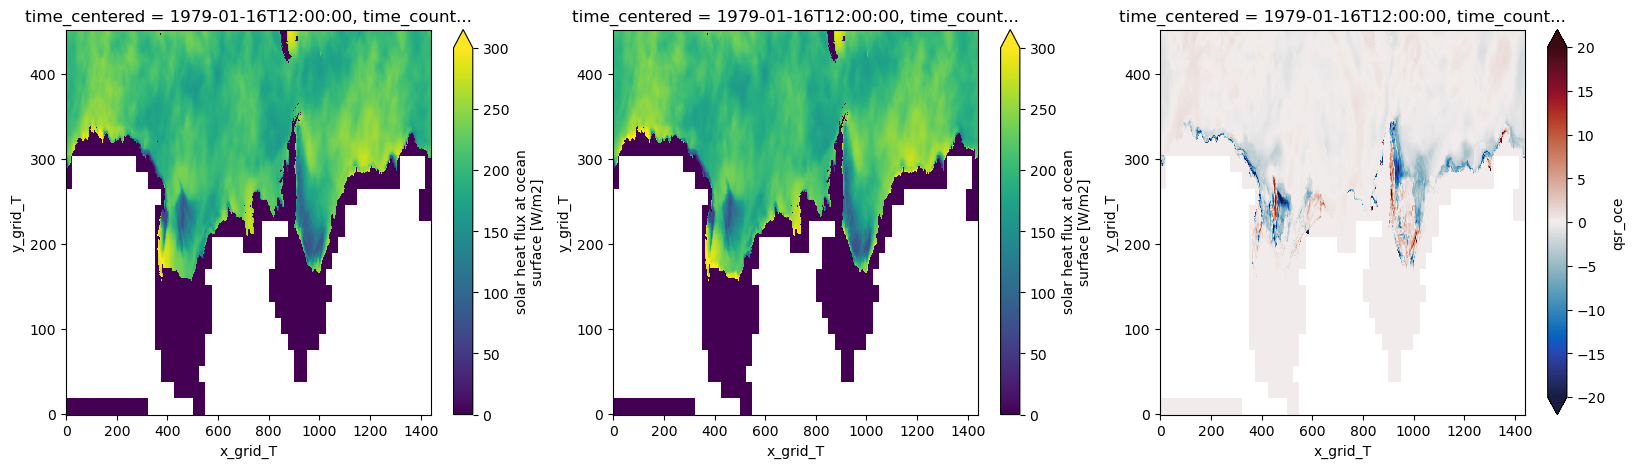

In [16]:
td=0
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=td).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
ds5.isel(time_counter=td).qsr_oce.plot(ax=ax[1], vmin=0, vmax=300)
(ds5-ds4).isel(time_counter=td).qsr_oce.plot(ax=ax[2], vmin=-20, vmax=20, cmap=cmocean.cm.balance)

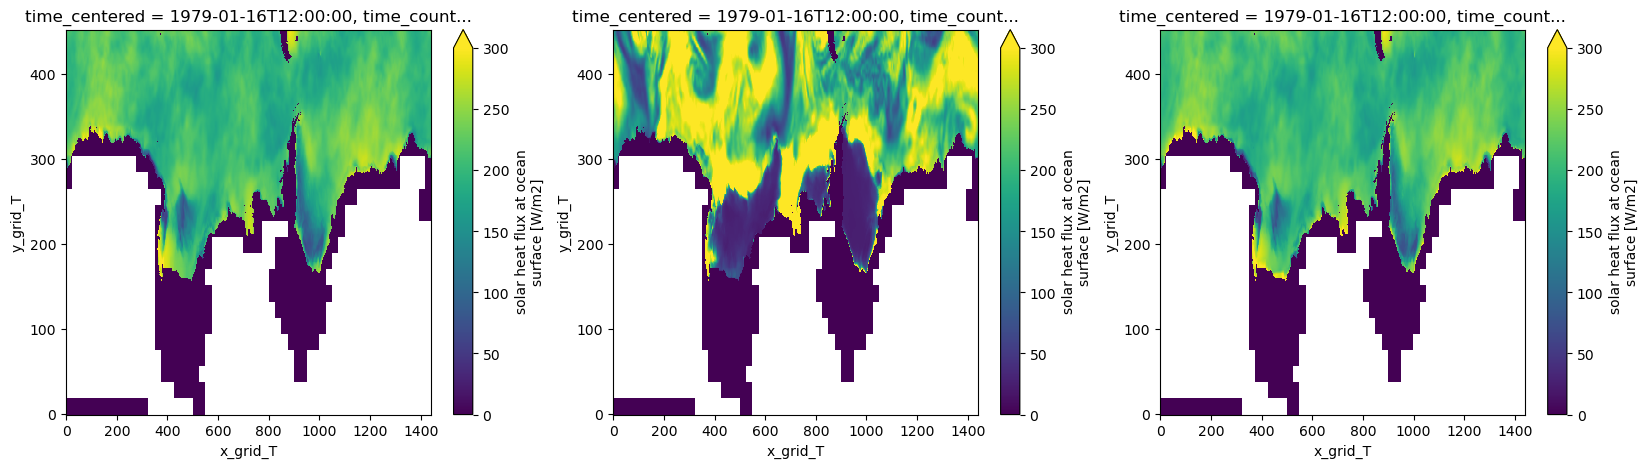

In [10]:
td=0
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=td).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
ds1.isel(time_counter=td).qsr_oce.plot(ax=ax[1], vmin=0, vmax=300)
ds5.isel(time_counter=td).qsr_oce.plot(ax=ax[2], vmin=0, vmax=300)

In [15]:
bias = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/TREFHT_mean_1979-2015.nc')

In [12]:
def _griddata(arr, xi, method: str):
    ar1d = arr.ravel()
    valid = np.isfinite(ar1d)
    if valid.all():
        return arr
    return griddata(
        points=tuple(x[valid] for x in xi),
        values=ar1d[valid],
        xi=xi,
        method=method,
        fill_value=np.nan,
    ).reshape(arr.shape)


def interpolate_na(da, dim, method="nearest", use_coordinates=True, keep_attrs=True):
    # Create points only once.
    if use_coordinates:
        coords = [da.coords[d] for d in dim]
    else:
        coords = [np.arange(da.sizes[d]) for d in dim]

    xi = tuple(x.ravel() for x in np.meshgrid(*coords, indexing="ij"))
    arr = xr.apply_ufunc(
        _griddata,
        da,
        input_core_dims=[dim],
        output_core_dims=[dim],
        output_dtypes=[da.dtype],
        dask="parallelized",
        vectorize=True,
        keep_attrs=keep_attrs,
        kwargs={"xi": xi, "method": method},
    ).transpose(*da.dims)
    return arr


In [13]:
from scipy.interpolate import griddata

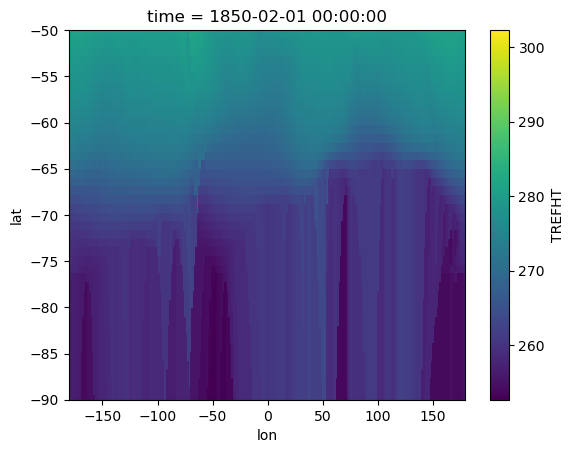

In [17]:
interpolate_na(bias.TREFHT, ["lat", "lon"], method="nearest").sortby('lon').plot(ylim=(-90,-50))

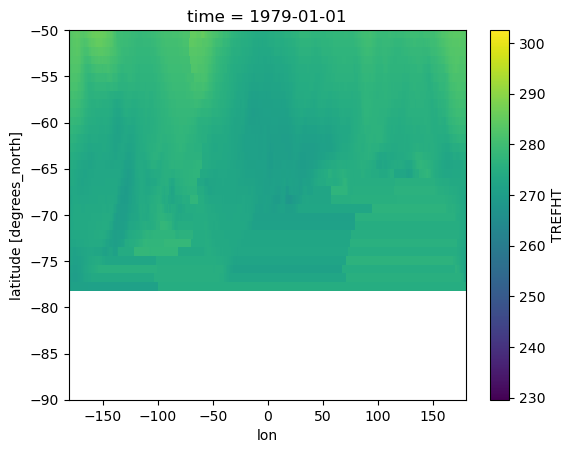

In [64]:
bias.sortby('lon').interpolate_na(dim='lon', method='nearest', fill_value='extrapolate').isel(time=0).TREFHT.plot(ylim=(-90,-50))

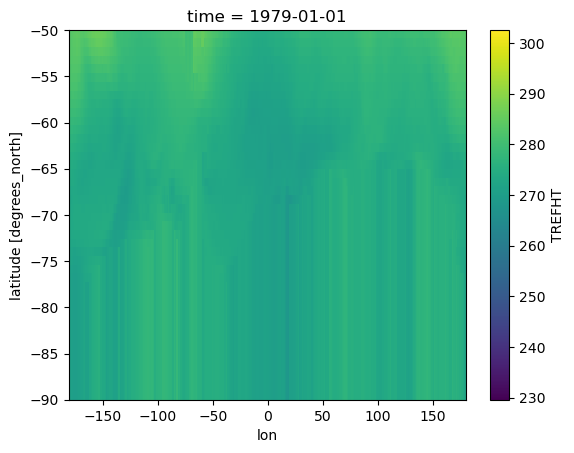

In [65]:
bias.sortby('lon').interpolate_na(dim='lat', method='nearest', fill_value='extrapolate').isel(time=0).TREFHT.plot(ylim=(-90,-50))

In [36]:
# biaso = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/processed/TREFHT_mean_1980-1981.nc')
bias  = xr.open_dataset(f'{base_dir}climate-forcing/CESM2/LE2/bias-corrected/CESM2-LE2_ens1011.001_TREFHT_bias_corr_test_y1979.nc')

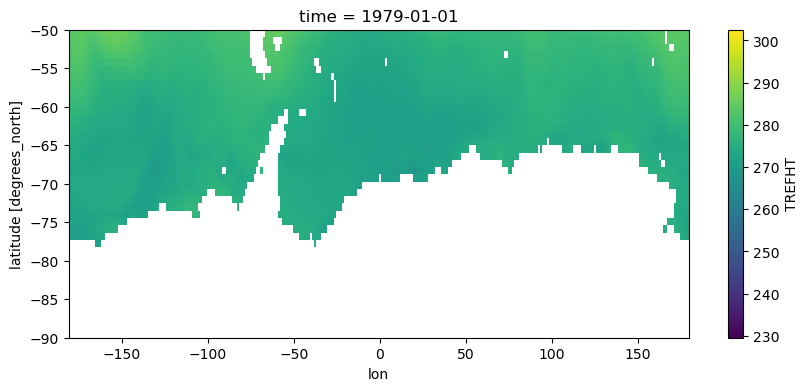

In [42]:
bias.isel(time=0).TREFHT.sortby('lon').plot(figsize=(10,4), ylim=(-90,-50))

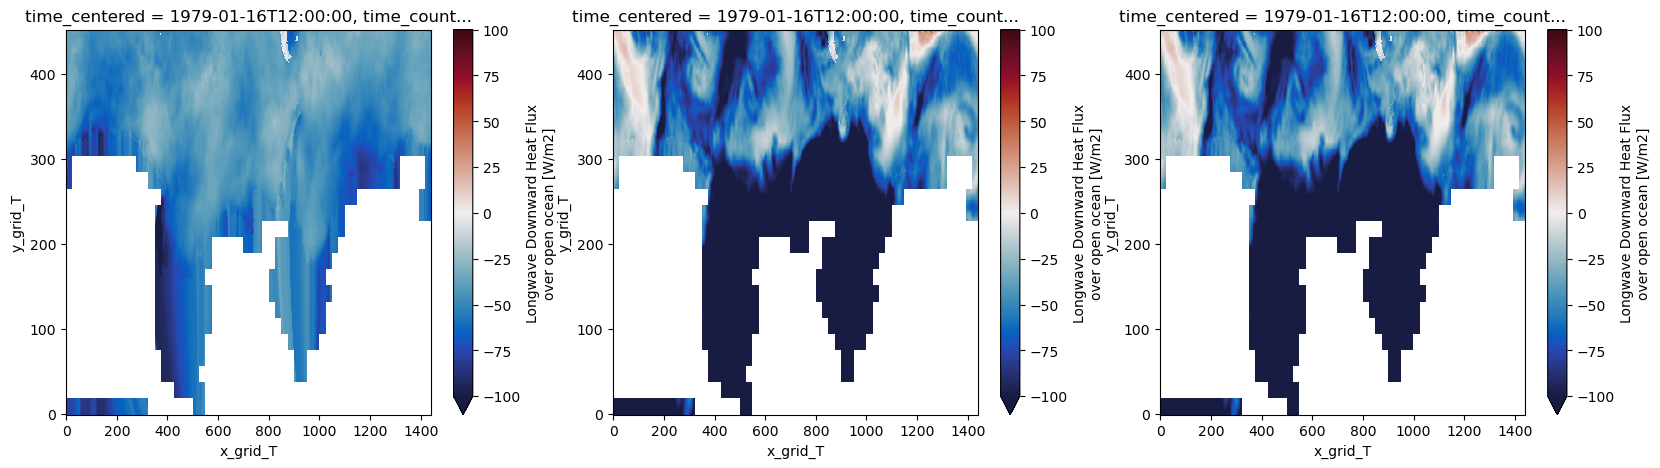

In [45]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=0).qlw_oce.plot(ax=ax[0], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
ds1.isel(time_counter=0).qlw_oce.plot(ax=ax[1], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
ds2.isel(time_counter=0).qlw_oce.plot(ax=ax[2], vmin=-100, vmax=100, cmap=cmocean.cm.balance)

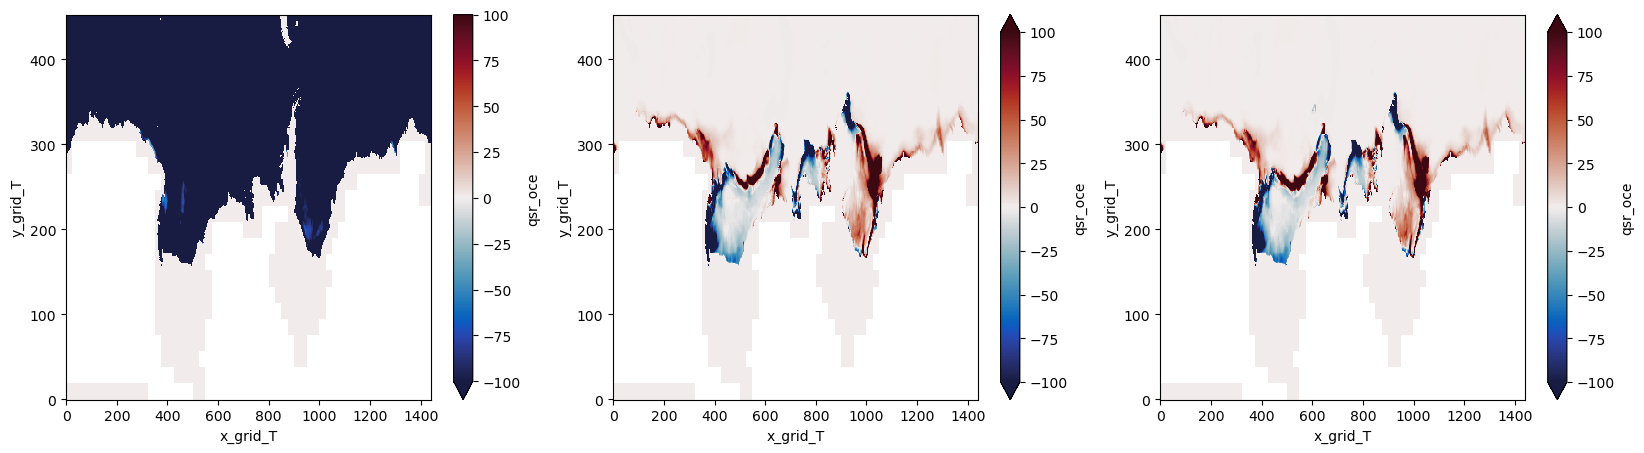

In [52]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
(ds0.isel(time_counter=5).qsr_oce - ds0.isel(time_counter=0).qsr_oce).plot(ax=ax[0], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
(ds1.isel(time_counter=5).qsr_oce - ds1.isel(time_counter=0).qsr_oce).plot(ax=ax[1], vmin=-100, vmax=100, cmap=cmocean.cm.balance)
(ds2.isel(time_counter=5).qsr_oce - ds2.isel(time_counter=0).qsr_oce).plot(ax=ax[2], vmin=-100, vmax=100, cmap=cmocean.cm.balance)

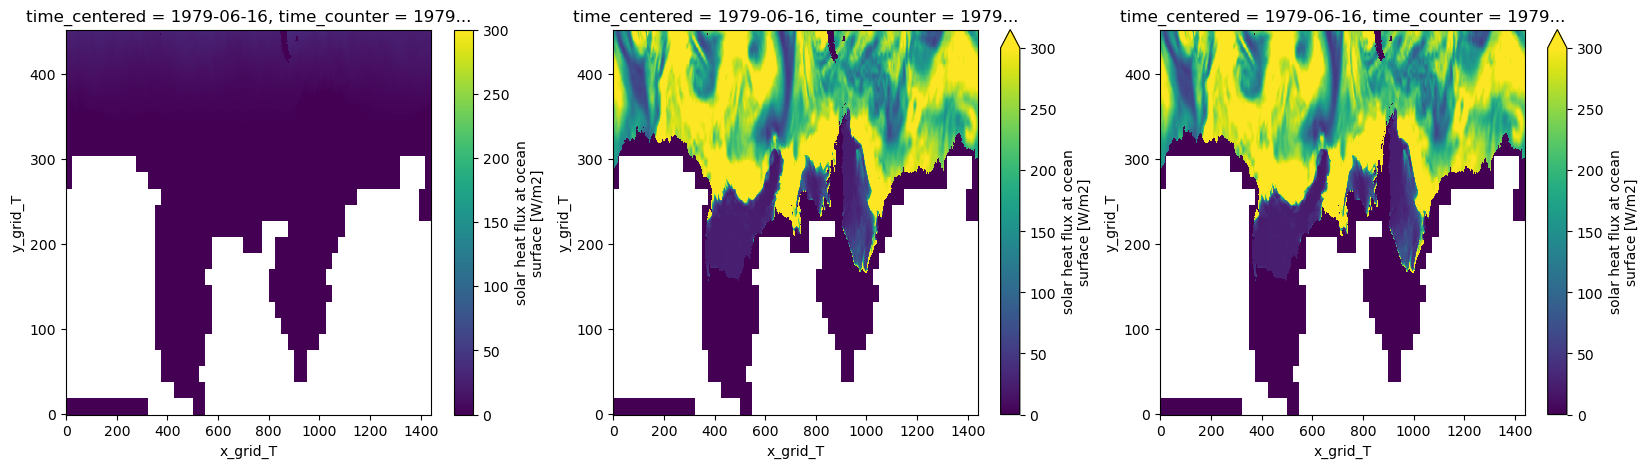

In [51]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=5).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
ds1.isel(time_counter=5).qsr_oce.plot(ax=ax[1], vmin=0, vmax=300)
ds2.isel(time_counter=5).qsr_oce.plot(ax=ax[2], vmin=0, vmax=300)

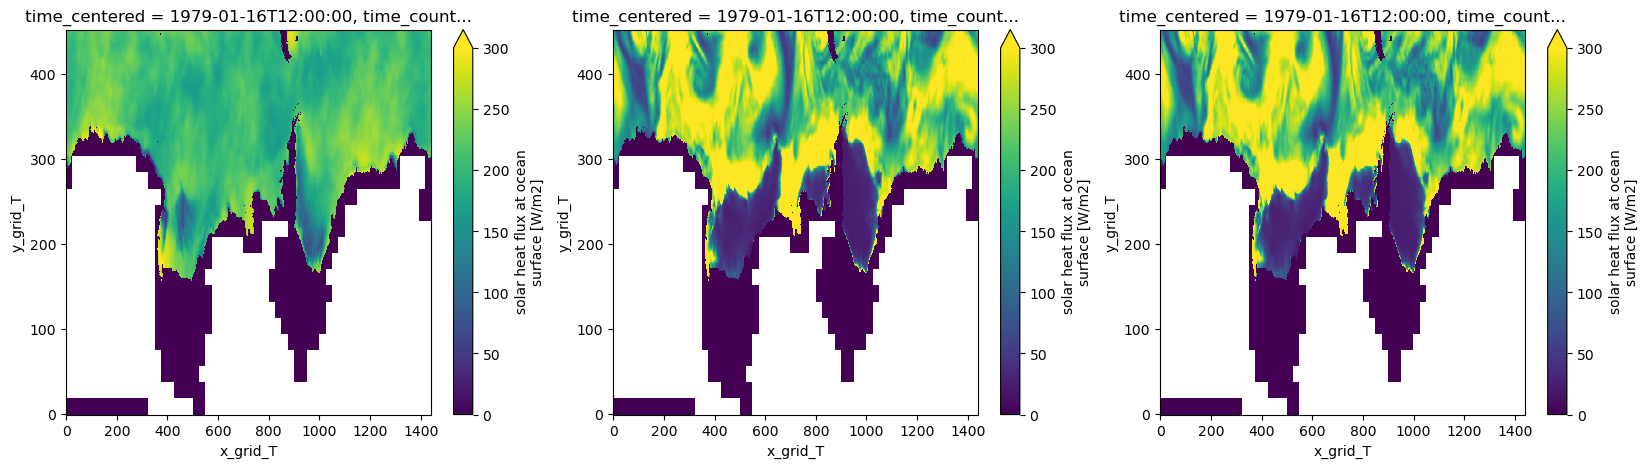

In [48]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds0.isel(time_counter=0).qsr_oce.plot(ax=ax[0], vmin=0, vmax=300)
ds1.isel(time_counter=0).qsr_oce.plot(ax=ax[1], vmin=0, vmax=300)
ds2.isel(time_counter=0).qsr_oce.plot(ax=ax[2], vmin=0, vmax=300)

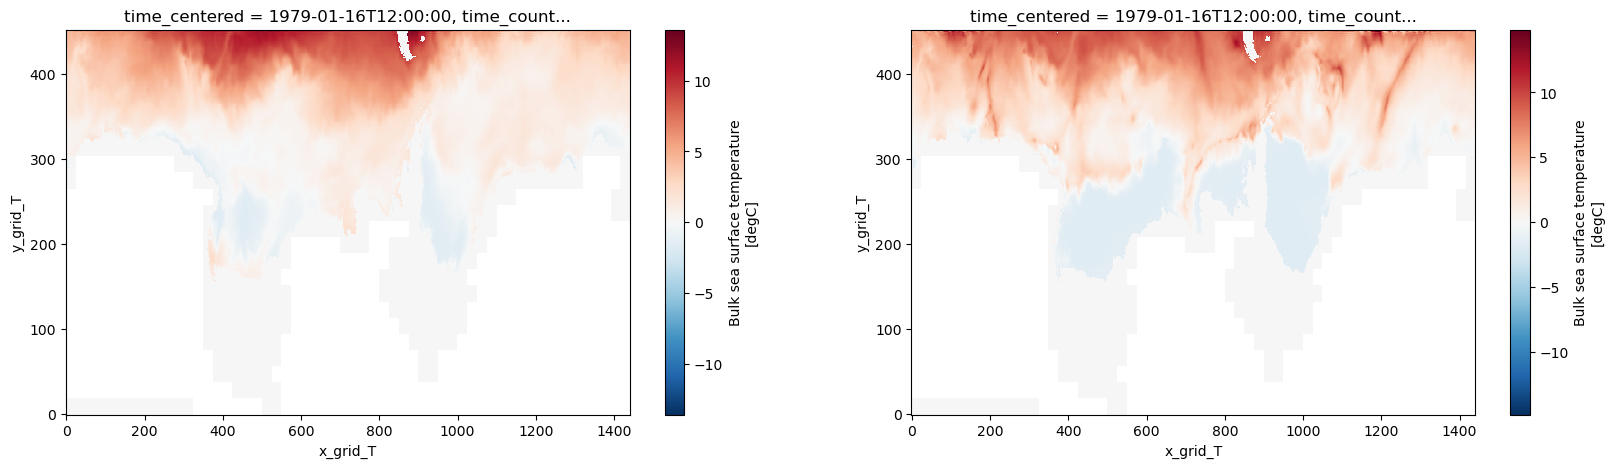

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
ds0.isel(time_counter=0).sosst.plot(ax=ax[0])
ds1.isel(time_counter=0).sosst.plot(ax=ax[1])

In [91]:
rename_dict = {'avg_sdlwrf':'msdwlwrf', 'avg_sdswrf':'msdwswrf', 'avg_tsrwe':'msr'}

for filename in glob.glob(f'{base_dir}ERA5-forcing/daily/*.nc'):
    print(filename)
    with xr.open_dataset(filename, mode='a') as data:
        varname = list(data.keys())[0]
        print(varname)
        data2 = data.rename(name_dict={varname:rename_dict[varname]})
        data.close()
    
    data2.to_netcdf(filename, mode='a')

/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/msdwlwrf_y2003.nc
avg_sdlwrf
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/msdwswrf_y2002.nc
avg_sdswrf
/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/ERA5-forcing/daily/msdwswrf_y2003.nc
avg_sdswrf


### Regional mean monthly timeseries of atmospheric forcing:

In [3]:
variable='TREFHT'; 
year_start=1979; year_end=1980;

era5_folder  =f'{base_dir}ERA5-forcing/daily/files/'
cesm1_folder =f'{base_dir}climate-forcing/CESM1/LENS/'
cesm2_folder =f'{base_dir}climate-forcing/CESM2/LE2/'

Load CESM1 files:

In [29]:
# b.e11.B20TRC5CNBDRD.f09_g16.013.cam.h0.TREFHT.192001-200512.nc 
CESM1_ds = xr.open_mfdataset(f'{cesm1_folder}*{variable}*.nc', concat_dim='ens', combine='nested')[variable].sel(lat=slice(-90,-50))
CESM1_ds = CESM1_ds.isel(time=((CESM1_ds.time.dt.year <= year_end)*(CESM1_ds.time.dt.year >= year_start)))
CESM1_ds['lon'] = fix_lon_range(CESM1_ds['lon'])
CESM1_ds = CESM1_ds.sortby('lon').resample(time="ME").mean().drop_isel(lat=[20,24,33])
land_mask = cesm2_landmask.sel(lat=slice(-90,-50)).sortby('lon')
land_mask['lat'] = CESM1_ds['lat']
CESM1_ocn = xr.where(land_mask==0, CESM1_ds, np.nan)

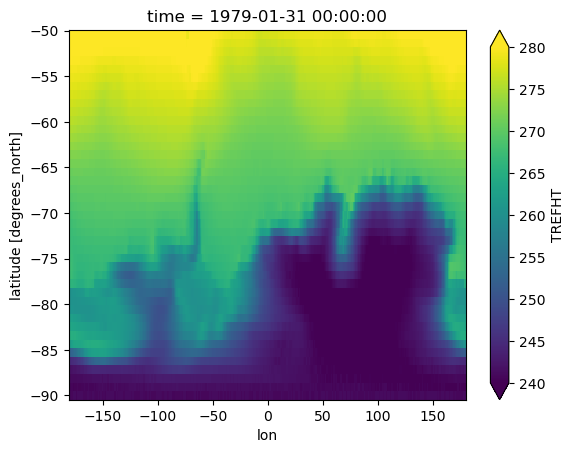

In [33]:
CESM1_ds.mean(dim='ens').isel(time=0).plot(vmin=240, vmax=280)

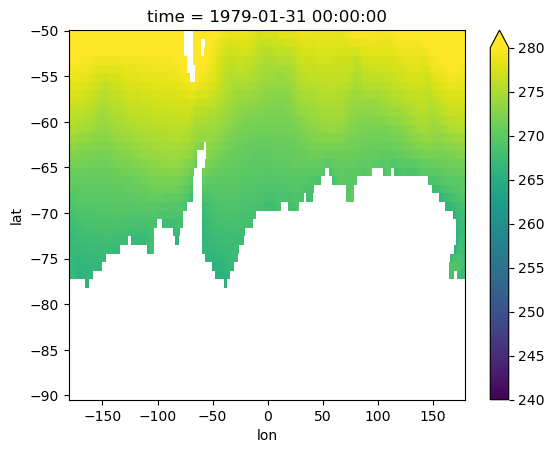

In [32]:
CESM1_ocn.mean(dim='ens').isel(time=0).plot(vmin=240, vmax=280)

In [44]:
# now calculate regional means: weddell gyre region and maud rise polynya region
cesm1_circum       = CESM1_ds.mean(dim=('lat','lon'))
cesm1_weddell_gyre = CESM1_ds.sel(lon=slice(-60,-10) , lat=slice(-80,-60)).mean(dim=('lat','lon'))
cesm1_maud_rise    = CESM1_ds.sel(lon=slice(0,120)   , lat=slice(-72,-55)).mean(dim=('lat','lon'))
cesm1_amundsen     = CESM1_ds.sel(lon=slice(-140,-80), lat=slice(-75,-63)).mean(dim=('lat','lon'))

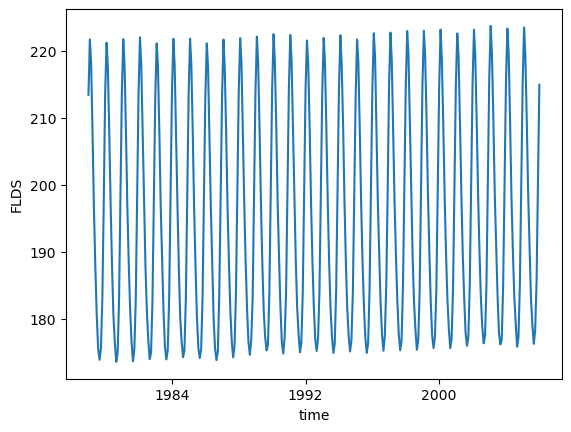

In [47]:
cesm1_circum.mean(dim='ens').plot()

Load CESM2 files:

In [5]:
cesm2_landmask = xr.open_dataset(f'{cesm2_folder}b.e21.BHISTsmbb.f09_g17.LE2-1011.001.cam.h0.LANDFRAC.185001-185912.nc').LANDFRAC.isel(time=0)
cesm2_landmask['lon'] = fix_lon_range(cesm2_landmask['lon'])

In [18]:
# Load ensembles dataset
for e, ens in enumerate(cesm2_ensemble_members):
    files_to_open = []
    for year in range(year_start, year_end+1):
        file_path     = find_processed_cesm2_file('LE2', variable, ens, year)
        files_to_open += [file_path]
    
    if e==0:
        ensemble_ds = xr.open_mfdataset(files_to_open).sel(lat=slice(-90,-50)).sortby('lon')
    else:
        ens_ds = xr.open_mfdataset(files_to_open).sel(lat=slice(-90,-50)).sortby('lon')
        ensemble_ds = xr.concat([ensemble_ds, ens_ds], 'ens')

# resample data to monthly mean and mask land
monthly_ds  = ensemble_ds.resample(time="ME").mean()
land_mask   = cesm2_landmask.sel(lat=slice(-90,-50)).sortby('lon')
monthly_ocn = xr.where(land_mask==0, monthly_ds[variable], np.nan)

In [19]:
# now calculate regional means: weddell gyre region and maud rise polynya region
cesm2_circum       = monthly_ocn.mean(dim=('lat','lon'))
cesm2_weddell_gyre = monthly_ocn.sel(lon=slice(-60,-10) , lat=slice(-80,-60)).mean(dim=('lat','lon'))
cesm2_maud_rise    = monthly_ocn.sel(lon=slice(0,120)   , lat=slice(-72,-55)).mean(dim=('lat','lon'))
cesm2_amundsen     = monthly_ocn.sel(lon=slice(-140,-80), lat=slice(-75,-63)).mean(dim=('lat','lon'))
cesm2_longitude     = monthly_ocn.mean(dim='lon')

ERA5 forcing

In [20]:
era5_landmask = xr.open_dataset(f'{era5_folder}land_sea_mask.nc').isel(valid_time=0).lsm
era5_landmask['longitude'] = fix_lon_range(era5_landmask['longitude'])
era5_landmask = era5_landmask.sel(latitude=slice(-50,-90)).sortby('longitude')

CESM2_to_ERA5_varnames = {'TREFHT':'t2m','FSDS':'msdwswrf','FLDS':'msdwlwrf','PRECS':'msr', 'PRECT':'mtpr'}

In [21]:
era5_var = CESM2_to_ERA5_varnames[variable]; 
ERA5_ds  = xr.open_mfdataset(f'{era5_folder}{era5_var}_*.nc').sel(latitude=slice(-50,-90)).sortby('longitude').rename({'valid_time':'time'})
ERA5_ds  = ERA5_ds.isel(time=((ERA5_ds.time.dt.year <= year_end)*(ERA5_ds.time.dt.year >= year_start)))

# resample data to monthly mean and mask land
ERA5_monthly_ds  = ERA5_ds.resample(time="ME").mean()
ERA5_monthly_ocn = xr.where(era5_landmask==0, ERA5_monthly_ds[era5_var], np.nan)

In [22]:
# now calculate regional means: weddell gyre region and maud rise polynya region
era5_circum       = ERA5_monthly_ocn.mean(dim=('latitude','longitude'))
era5_weddell_gyre = ERA5_monthly_ocn.sel(longitude=slice(-60,-10) , latitude=slice(-60,-80)).mean(dim=('latitude','longitude'))
era5_maud_rise    = ERA5_monthly_ocn.sel(longitude=slice(0,120)   , latitude=slice(-55,-72)).mean(dim=('latitude','longitude'))
era5_amundsen     = ERA5_monthly_ocn.sel(longitude=slice(-140,-80), latitude=slice(-63,-75)).mean(dim=('latitude','longitude'))
era5_longitude    = ERA5_monthly_ocn.mean(dim='longitude')

Plot

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,9))
fig.suptitle(variable)

# --- CESM2 ---------------------
# for ens, ens_name in enumerate(cesm2_ensemble_members):
#     kwags = {'label':ens_name, 'linewidth':0.5}
#     ax[0,0].plot(cesm2_circum.time      , cesm2_circum.isel(ens=ens)      ,**kwags)
#     ax[0,1].plot(cesm2_weddell_gyre.time, cesm2_weddell_gyre.isel(ens=ens),**kwags)
#     ax[1,0].plot(cesm2_amundsen.time    , cesm2_amundsen.isel(ens=ens)    ,**kwags)
#     ax[1,1].plot(cesm2_maud_rise.time   , cesm2_maud_rise.isel(ens=ens)   ,**kwags)

kwags_cesm2_ensmean = {'label':'CESM2 ensemble mean', 'linewidth':2.5}
ax[0,0].plot(cesm2_circum.time      , cesm2_circum.mean(dim='ens')       ,**kwags_cesm2_ensmean)
ax[0,1].plot(cesm2_weddell_gyre.time, cesm2_weddell_gyre.mean(dim='ens') ,**kwags_cesm2_ensmean)
ax[1,0].plot(cesm2_amundsen.time    , cesm2_amundsen.mean(dim='ens')     ,**kwags_cesm2_ensmean)
ax[1,1].plot(cesm2_maud_rise.time   , cesm2_maud_rise.mean(dim='ens')    ,**kwags_cesm2_ensmean)

# --- ERA5 ---------------------
kwags_era5 = {'label':'ERA5', 'linewidth':2.5}
ax[0,0].plot(era5_circum.time      , era5_circum      ,**kwags_era5)
ax[0,1].plot(era5_weddell_gyre.time, era5_weddell_gyre,**kwags_era5)
ax[1,0].plot(era5_amundsen.time    , era5_amundsen    ,**kwags_era5)
ax[1,1].plot(era5_maud_rise.time   , era5_maud_rise   ,**kwags_era5)

regions=['Circumpolar', 'Weddell Gyre', 'Amundsen Sea', 'Maud Rise']
for a, axis in enumerate(ax.ravel()):
    axis.set_title(regions[a])
    
ax[0,1].legend(loc=(1.05, 0.5))

In [6]:
land_mask = cesm2_landmask.sel(lat=slice(-90,-50)).sortby('lon')
CESM1_ocn = xr.where(land_mask.values==0, CESM1_ds.drop_isel(lat=[20,24,33]), np.nan)

NameError: name 'CESM1_ds' is not defined